In [11]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from matplotlib import pyplot as plt

In [12]:
df = pd.read_json("test.json", lines=True)
df

,category,headline,link
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,https://www.thedailystar.net/tech-startup/news...
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,https://www.thedailystar.net/tech-startup/scie...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,https://www.thedailystar.net/tech-startup/news...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,https://www.thedailystar.net/tech-startup/news...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,https://www.thedailystar.net/tech-startup/news...
...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,https://www.thedailystar.net/youth/young-icons...
1996,YOUTH,Skipping towards Guinness World Records,https://www.thedailystar.net/youth/young-icons...
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,https://www.thedailystar.net/youth/young-icons...
1998,YOUTH,Building the path to a data-driven Bangladesh,https://www.thedailystar.net/youth/young-icons...


In [13]:
df['category'].value_counts()

TECHNOLOGY       200
BUSINESS         200
ENTERTAINMENT    200
ENVIRONMENT      200
INTERNATIONAL    200
NATIONAL         200
LIFESTYLE        200
POLITICS         200
SPORTS           200
YOUTH            200
Name: category, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['category'])
i=0
d={}
for x in le.classes_:
    print('{}  {}'.format(x,i))
    d[x]=i
    i=i+1

BUSINESS  0
ENTERTAINMENT  1
ENVIRONMENT  2
INTERNATIONAL  3
LIFESTYLE  4
NATIONAL  5
POLITICS  6
SPORTS  7
TECHNOLOGY  8
YOUTH  9


In [15]:
df['encoded category']=le.transform(df['category'])
df['encoded category']=df['encoded category'].astype(int)
df

,category,headline,link,encoded category
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,https://www.thedailystar.net/tech-startup/news...,8
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,https://www.thedailystar.net/tech-startup/scie...,8
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,https://www.thedailystar.net/tech-startup/news...,8
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,https://www.thedailystar.net/tech-startup/news...,8
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,https://www.thedailystar.net/tech-startup/news...,8
...,...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,https://www.thedailystar.net/youth/young-icons...,9
1996,YOUTH,Skipping towards Guinness World Records,https://www.thedailystar.net/youth/young-icons...,9
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,https://www.thedailystar.net/youth/young-icons...,9
1998,YOUTH,Building the path to a data-driven Bangladesh,https://www.thedailystar.net/youth/young-icons...,9


In [16]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(df['encoded category'])

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.headline.values, 
                                                  y, 
                                                  test_size=0.1, 
                                                  random_state=42, 
                                                  stratify=df['encoded category'].values)

In [18]:
y_test=np.argmax(y_val,axis=-1)
y_test

array([0, 4, 9, 1, 7, 5, 8, 1, 7, 6, 6, 9, 8, 9, 1, 6, 1, 2, 2, 8, 0, 5,
       8, 5, 1, 2, 8, 0, 5, 3, 3, 8, 7, 0, 7, 8, 9, 7, 2, 3, 8, 3, 4, 7,
       6, 9, 9, 2, 7, 7, 1, 7, 6, 8, 9, 7, 5, 6, 7, 7, 2, 3, 6, 8, 7, 6,
       6, 1, 0, 5, 1, 0, 5, 8, 8, 4, 0, 9, 6, 3, 1, 1, 9, 3, 6, 6, 4, 6,
       4, 8, 2, 1, 4, 1, 3, 1, 0, 2, 6, 7, 8, 4, 8, 6, 4, 1, 6, 9, 5, 4,
       4, 4, 5, 9, 0, 7, 1, 3, 3, 5, 2, 5, 0, 4, 6, 2, 1, 5, 7, 0, 5, 9,
       2, 0, 0, 4, 5, 3, 4, 3, 2, 4, 9, 0, 3, 9, 9, 2, 3, 3, 5, 0, 4, 0,
       0, 7, 8, 3, 4, 3, 1, 6, 2, 1, 6, 3, 0, 7, 8, 8, 2, 5, 9, 4, 0, 5,
       9, 8, 7, 2, 2, 5, 2, 8, 2, 3, 7, 4, 3, 5, 9, 0, 4, 2, 6, 1, 1, 9,
       5, 9], dtype=int64)

In [2]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
encoding = tokenizer(
    'Anthony Edward Stark known as Tony Stark is a fictional character in Avengers',
    add_special_tokens=True,
    max_length=20,
    truncation=False,
    padding='max_length', 
    )
for key, value in encoding.items():
    print( '{} : {}'.format( key, value ) )


input_ids : [101, 4938, 3487, 9762, 2124, 2004, 4116, 9762, 2003, 1037, 7214, 2839, 1999, 14936, 102, 0, 0, 0, 0, 0]
token_type_ids : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [32]:
x_train = tokenizer(
    text=x_train.tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=False,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [33]:
x_train['input_ids'].shape

TensorShape([1800, 128])

In [19]:
x_test = tokenizer(
    text=x_val.tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [21]:
from transformers import TFBertModel
bert = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [22]:
#Creating the neural network
max_len = 128
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[1] 

intermediate_layer = tf.keras.layers.Dense(256, activation='relu', name='intermediate_layer')(embeddings)
intermediate_layer=tf.keras.layers.Dropout(0.1)(intermediate_layer)

output_layer = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(intermediate_layer)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=output_layer)
model.layers[2].trainable = True

In [23]:
model.load_weights("weights1/")

In [24]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [39]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_val
    ),
  epochs=5,
    batch_size=32
)

Epoch 1/5
57/57 [==============================] - 2251s 39s/step - loss: 2.2256 - accuracy: 0.1983 - val_loss: 1.8510 - val_accuracy: 0.5300
Epoch 2/5
57/57 [==============================] - 2242s 39s/step - loss: 1.5400 - accuracy: 0.5689 - val_loss: 1.1240 - val_accuracy: 0.7000
Epoch 3/5
57/57 [==============================] - 2181s 38s/step - loss: 0.9996 - accuracy: 0.7100 - val_loss: 0.8400 - val_accuracy: 0.7450
Epoch 4/5
57/57 [==============================] - 1865s 33s/step - loss: 0.7193 - accuracy: 0.7967 - val_loss: 0.7057 - val_accuracy: 0.7750
Epoch 5/5
57/57 [==============================] - 1829s 32s/step - loss: 0.5371 - accuracy: 0.8494 - val_loss: 0.6865 - val_accuracy: 0.8050


In [40]:
model.save_weights('weights1/')

In [25]:
def prepare_data(input_text, tokenizer):
    token = tokenizer(
    text=input_text,
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
    
    return {
        'input_ids': token.input_ids,
        'attention_mask': token.attention_mask
    }

def make_prediction(model, processed_data):
    probs = model.predict(processed_data)
    return probs

In [26]:
predictions=make_prediction(model,{'input_ids': x_test['input_ids'],
        'attention_mask': x_test['attention_mask']})

7/7 [==============================] - 62s 8s/step


In [27]:
#y_predicted = np.argmax(predictions, axis = 1)
print(y_test,y_predicted)

[0 4 9 1 7 5 8 1 7 6 6 9 8 9 1 6 1 2 2 8 0 5 8 5 1 2 8 0 5 3 3 8 7 0 7 8 9
 7 2 3 8 3 4 7 6 9 9 2 7 7 1 7 6 8 9 7 5 6 7 7 2 3 6 8 7 6 6 1 0 5 1 0 5 8
 8 4 0 9 6 3 1 1 9 3 6 6 4 6 4 8 2 1 4 1 3 1 0 2 6 7 8 4 8 6 4 1 6 9 5 4 4
 4 5 9 0 7 1 3 3 5 2 5 0 4 6 2 1 5 7 0 5 9 2 0 0 4 5 3 4 3 2 4 9 0 3 9 9 2
 3 3 5 0 4 0 0 7 8 3 4 3 1 6 2 1 6 3 0 7 8 8 2 5 9 4 0 5 9 8 7 2 2 5 2 8 2
 3 7 4 3 5 9 0 4 2 6 1 1 9 5 9] [0 4 4 1 1 5 8 9 1 6 6 9 4 9 1 6 1 5 3 8 9 6 8 5 1 4 8 0 5 3 3 0 7 0 7 8 9
 7 2 3 8 3 4 7 5 9 9 0 7 7 1 7 6 4 9 7 6 6 7 7 2 3 6 0 7 6 6 5 0 6 1 0 5 0
 9 4 0 9 6 3 1 1 9 3 6 6 4 6 4 8 2 1 1 1 3 1 0 2 6 7 8 4 0 6 4 1 5 5 5 4 4
 4 2 9 0 7 1 3 2 5 2 0 0 4 6 2 1 9 7 0 5 9 2 0 0 4 5 3 4 3 5 4 9 5 3 9 9 0
 3 3 8 0 4 5 0 7 8 0 4 3 1 6 2 1 6 0 0 7 5 8 2 2 9 4 0 2 9 8 7 2 2 5 2 8 2
 3 7 4 3 5 4 0 4 2 6 1 1 9 5 9]


In [28]:
df_result=pd.DataFrame({"Actual":y_test,"Predicted":y_predicted})
df_result

,Actual,Predicted
0,0,0
1,4,4
2,9,4
3,1,1
4,7,1
...,...,...
195,1,1
196,1,1
197,9,9
198,5,5


In [33]:
pre=le.inverse_transform(y_predicted)
og=le.inverse_transform(y_test)
from sklearn.metrics import classification_report
print(classification_report(og,pre))

               precision    recall  f1-score   support

     BUSINESS       0.65      0.85      0.74        20
ENTERTAINMENT       0.86      0.90      0.88        20
  ENVIRONMENT       0.78      0.70      0.74        20
INTERNATIONAL       0.94      0.85      0.89        20
    LIFESTYLE       0.79      0.95      0.86        20
     NATIONAL       0.55      0.55      0.55        20
     POLITICS       0.86      0.90      0.88        20
       SPORTS       1.00      0.90      0.95        20
   TECHNOLOGY       0.92      0.60      0.73        20
        YOUTH       0.81      0.85      0.83        20

     accuracy                           0.81       200
    macro avg       0.82      0.80      0.80       200
 weighted avg       0.82      0.81      0.80       200



Text(0.5, 36.72222222222221, 'predicted Values')

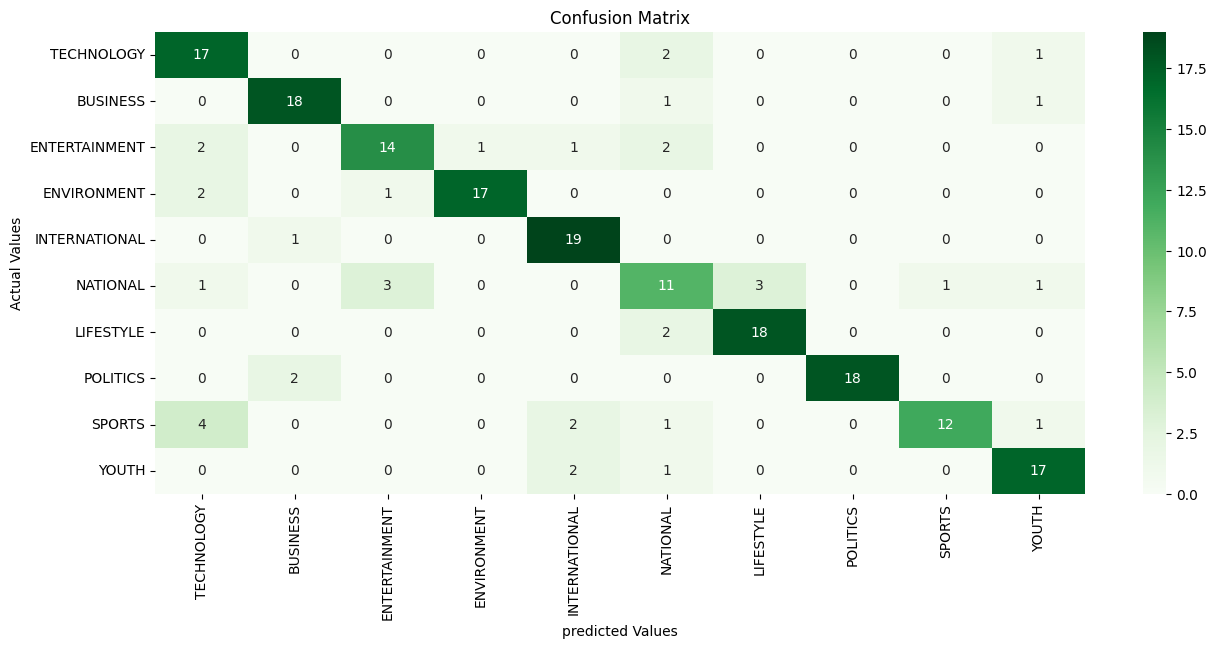

In [32]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
outputs=df['category'].unique()
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm,
                    outputs, 
                    outputs)
#Plotting the confusion matrix
plt.figure(figsize=(15,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('predicted Values')

In [34]:
input_text = "CPD raises flag over US turning into top remittance source"
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(model, processed_data)
cls=np.argmax(result[0],axis=-1)
for x in d:
    if(d[x]==cls):
        print("Predicted Class is "+x)
        break

1/1 [==============================] - 2s 2s/step
Predicted Class is BUSINESS
